In [1]:
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
names = ['mpg', 'cylinders','displacement', 'horsepower',
         'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

df1 = df[['mpg','horsepower']]
df2 = df1.dropna()

x = np.array(df2['horsepower'])
y = np.array(df2['mpg'])
np.mean(x)

104.46938775510205

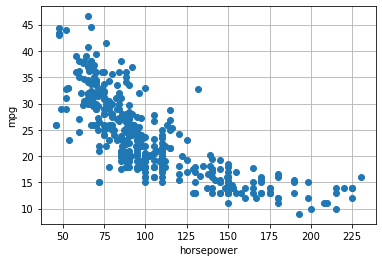

In [3]:
plt.plot(x,y,'o')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

Let's see how the regression model works.

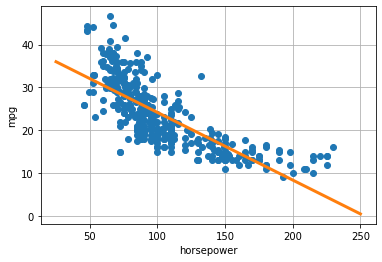

In [5]:
xmodel = np.array([25,250])
ymodel = beta0 + beta1*xmodel

plt.plot(x,y,'o')
plt.plot(xmodel,ymodel,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

In [6]:
yhat = beta0 + beta1*x
SSE = np.mean((y - yhat)**2)
print(SSE)

23.943662938603108


Decent...but can we do better? There seems to be a 1/x type dependence. Let's test it to see if it gives lower error.

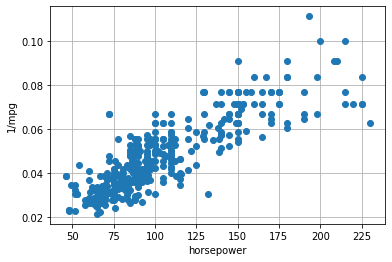

In [7]:
z = 1/y
plt.plot(x,z,'o')
plt.xlabel('horsepower')
plt.ylabel('1/mpg')
plt.grid(True)

Looks linear! Let's fit a linear model between x and z.

In [8]:
xm = np.mean(x)
zm = np.mean(z)
sxx = np.mean((x-xm)**2)
szz = np.mean((z-zm)**2)
szx = np.mean((z-zm)*(x-xm))

beta1 = szx/sxx
beta0 = zm - beta1*xm

print([beta0,beta1])

[0.009218138877684919, 0.00036952728304329803]


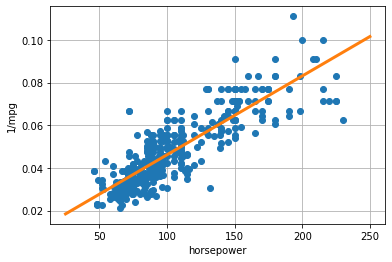

In [9]:
xmodel = np.array([25,250])
zmodel = beta0 + beta1*xmodel

plt.plot(x,z,'o')
plt.plot(xmodel,zmodel,'-',linewidth=3)
plt.xlabel('horsepower')
plt.ylabel('1/mpg')
plt.grid(True)

Maybe it helps to visualize on the original mpg data (instead of the inverse?) Let's check.

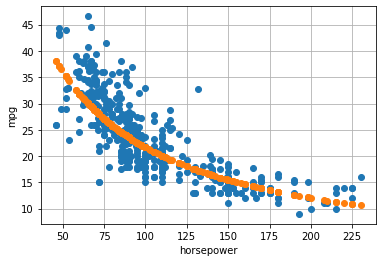

In [10]:
zhat = beta0 + beta1*x
yhat_inv = 1/zhat

plt.plot(x,y,'o')
plt.plot(x,yhat_inv,'o')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.grid(True)

Great! Let's now check error.

In [11]:
SSE_inv = np.mean((y - yhat_inv)**2)

print("MSE = {0:.2f} (linear)".format(SSE))
print("MSE_inv = {0:.2f} (linear+inversion)".format(SSE_inv))

MSE = 23.94 (linear)
MSE_inv = 20.66 (linear+inversion)
